In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

DATAPATH = "data"

In [2]:
heart = pd.read_csv(os.path.join(DATAPATH,"heart.csv"))
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Encoding of binary variables

In [4]:

enc = LabelEncoder()
heart_cat = heart.apply(enc.fit_transform)
heart_cat

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


# Mask Cholesterol, RestingBP 0 with median

In [5]:
heart_cat['Cholesterol'].mask(heart_cat['Cholesterol']==0,heart_cat['Cholesterol'].median(),inplace=True)
heart_cat['RestingBP'].mask(heart_cat['RestingBP']==0,heart_cat['RestingBP'].mean(),inplace=True)

In [3]:
heart_int = heart[heart.describe().columns].drop(['FastingBS'],axis=1)
heart_int['Cholesterol'].mask(heart_int['Cholesterol']==0,heart_int['Cholesterol'].median(),inplace=True)
heart_int['RestingBP'].mask(heart_int['RestingBP']==0,heart_int['RestingBP'].median(),inplace=True)
heart_int

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0
...,...,...,...,...,...,...
913,45,110,264,132,1.2,1
914,68,144,193,141,3.4,1
915,57,130,131,115,1.2,1
916,57,130,236,174,0.0,1


In [246]:
print(sum(heart_int['HeartDisease']))
918-508

508


410

In [4]:
heart_int.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,240.581699,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.982967,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


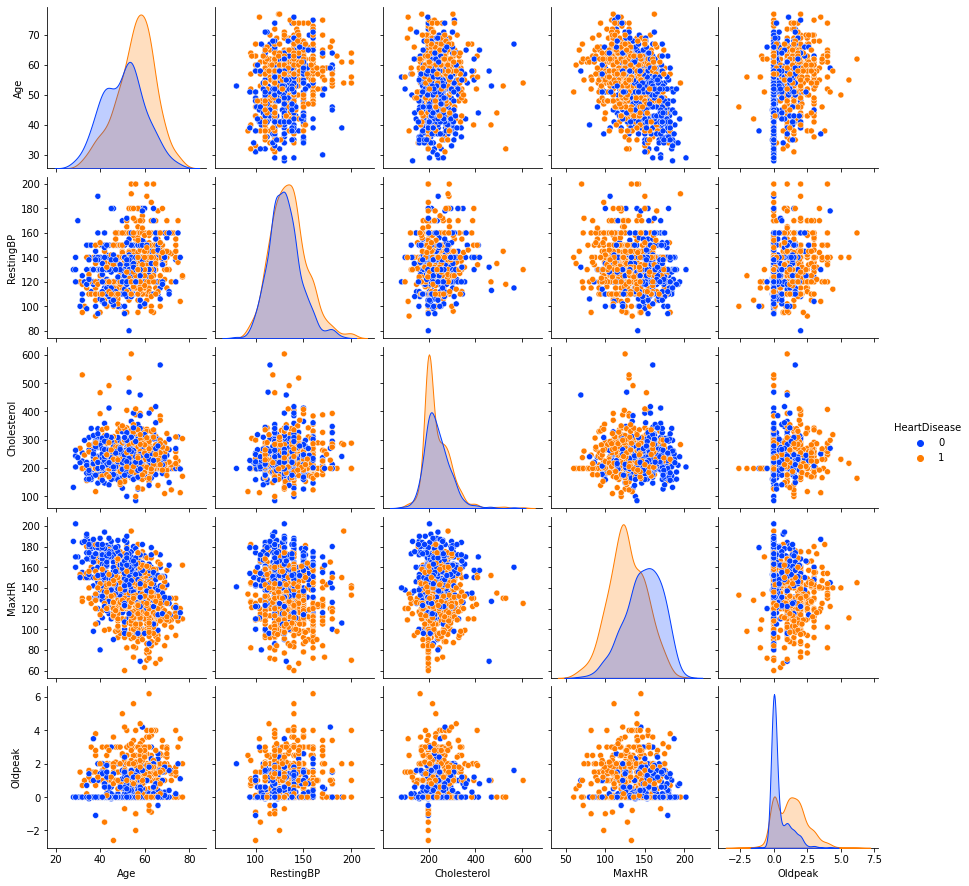

In [157]:
sns.pairplot(heart_int, hue="HeartDisease", palette="bright")

In [159]:
heart_int.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540737,236.047413,136.809368,0.887364,0.553377
std,9.432617,17.989932,56.240952,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.799564,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [160]:
corr = heart_int.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263079,0.006397,-0.382045,0.258612,0.282039
RestingBP,0.263079,1.000000,0.096524,-0.109669,0.174215,0.117930
Cholesterol,0.006397,0.096524,1.000000,0.072644,0.059128,-0.012340
MaxHR,-0.382045,-0.109669,0.072644,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.174215,0.059128,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.117930,-0.012340,-0.400421,0.403951,1.000000


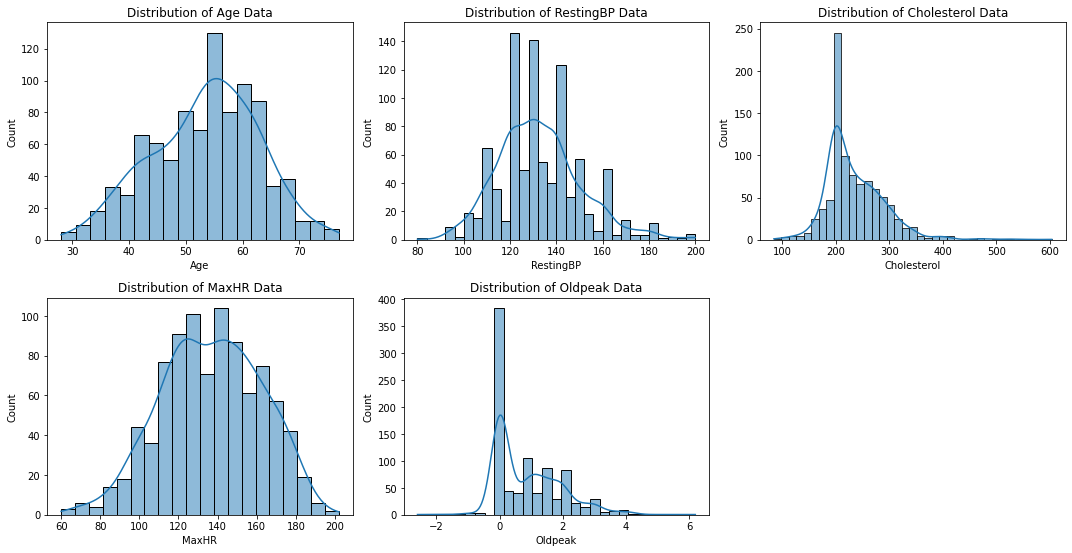

In [181]:
plt.figure(figsize=(15,15))
for i,col in enumerate(heart_int.drop("HeartDisease",axis=1).columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_int[col],kde=True)
    plt.tight_layout()
    plt.plot()

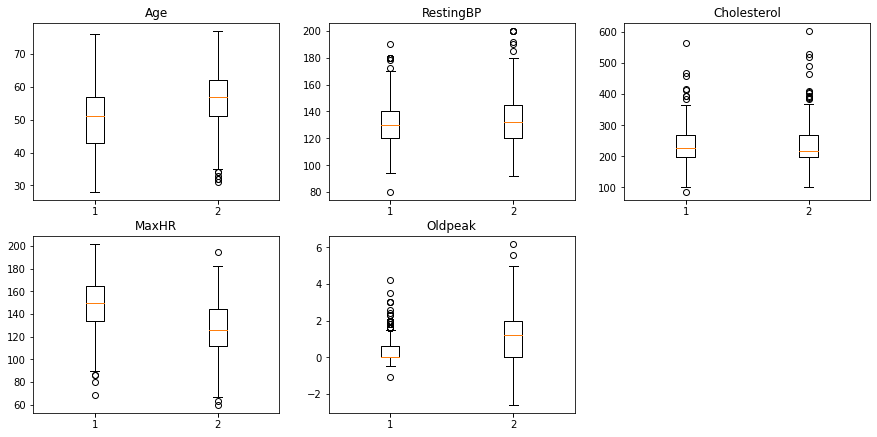

In [230]:
plt.figure(figsize=(15,15))
for i,col in enumerate(heart_int.columns,1):
    if(col!="HeartDisease"):
        plt.subplot(4,3,i)
        data =  [heart_int[heart_int["HeartDisease"]==0][col],heart_int[heart_int["HeartDisease"]==1][col]]
        plt.title(f"Distribution of {col} Data")
        plt.xticks([1,2],["=0","=1"])
        #plt.xlabel("HeartDisease")
        plt.title(col)
        plt.boxplot(data)
plt.show()

# Simpler classifiers
## 1.  KNN with categorical variables encoded, continuous values + Chrolesterol==0 masked with mean

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix

y = heart_cat['HeartDisease']
X = heart_cat.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [162]:
parameters = dict(n_neighbors=range(1,200))
knn = KNeighborsClassifier()
gridSearch = GridSearchCV(knn,parameters)
gridSearch.fit(X_train.values,y_train.values)
print("Best Score knn: "+str(gridSearch.best_score_))
prediction = gridSearch.predict(X_test.values)
test_accuracy = accuracy_score(y_test,prediction)
print("Test accuracy: "+str(test_accuracy))


Best Score knn: 0.7382113821138211
Test accuracy: 0.7194719471947195


In [163]:
pd.DataFrame(gridSearch.cv_results_).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003401,0.002419,0.007803,0.001600,1,{'n_neighbors': 1},0.666667,0.715447,0.723577,0.707317,0.674797,0.697561,0.022648,182
1,0.001594,0.000487,0.005199,0.001165,2,{'n_neighbors': 2},0.634146,0.674797,0.699187,0.682927,0.691057,0.676423,0.022648,199
2,0.002201,0.001941,0.007399,0.001022,3,{'n_neighbors': 3},0.764228,0.739837,0.723577,0.715447,0.691057,0.726829,0.024444,23
3,0.001799,0.001168,0.006402,0.001361,4,{'n_neighbors': 4},0.715447,0.739837,0.723577,0.715447,0.707317,0.720325,0.011028,53
4,0.001601,0.000798,0.004597,0.001200,5,{'n_neighbors': 5},0.747967,0.756098,0.723577,0.772358,0.682927,0.736585,0.031108,3
5,0.001200,0.000401,0.004197,0.000399,6,{'n_neighbors': 6},0.756098,0.747967,0.731707,0.747967,0.699187,0.736585,0.020309,3


C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


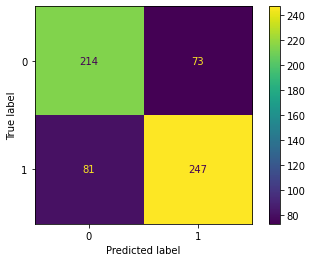

In [164]:
plot_confusion_matrix(gridSearch,X_train.values,y_train, values_format="d")

C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


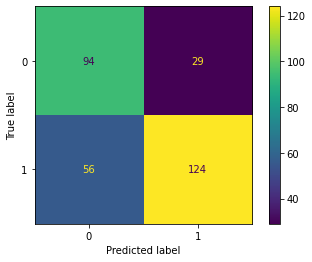

In [165]:
plot_confusion_matrix(gridSearch,X_test.values,y_test, values_format="d")

## 2.  SVM with only continuous values + Chrolesterol==0 masked with mean

In [166]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]

svc = SVC(random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc")
search.fit(X_train.values, y_train)
print("Best Score svc: "+str(search.best_score_))
prediction = search.predict(X_test.values)
test_accuracy = accuracy_score(y_test,prediction)
print("Test accuracy: "+str(test_accuracy))

Best Score svc: 0.9011179504101465
Test accuracy: 0.8448844884488449


In [167]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.806989,0.232021,0.002608,0.001740,linear,NaN,{'kernel': 'linear'},0.948166,0.918394,0.892610,0.868435,0.877984,0.901118,0.028940,1
1,0.011799,0.002403,0.003402,0.000802,poly,2,"{'degree': 2, 'kernel': 'poly'}",0.871079,0.845029,0.803296,0.783289,0.794960,0.819531,0.033130,2
2,0.011999,0.002191,0.003202,0.000749,poly,3,"{'degree': 3, 'kernel': 'poly'}",0.866295,0.845295,0.811271,0.768170,0.784881,0.815182,0.036505,4
3,0.010993,0.000896,0.006807,0.000750,rbf,NaN,{'kernel': 'rbf'},0.855130,0.836523,0.808878,0.795225,0.800796,0.819311,0.022852,3


C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


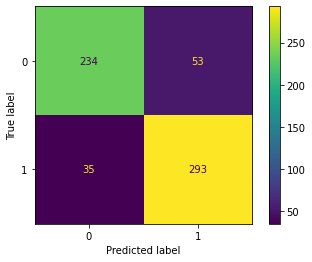

In [168]:
plot_confusion_matrix(search,X_train.values,y_train, values_format="d")

C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


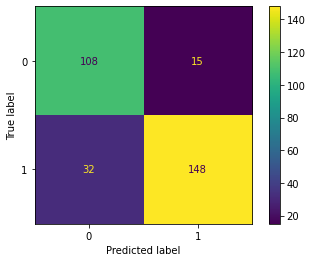

In [169]:
plot_confusion_matrix(search,X_test.values,y_test, values_format="d")

## 3. KNN with only numerical + Cholesterol,RestingBP == 0 masked with the median

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix

y = heart_int['HeartDisease']
X = heart_int.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [255]:
parameters = dict(n_neighbors=range(1,30))
knn = KNeighborsClassifier()
gridSearch_int = GridSearchCV(knn,parameters)
gridSearch_int.fit(X_train.values,y_train.values)
print("Best Score knn: "+str(gridSearch_int.best_score_))
prediction = gridSearch_int.predict(X_test.values)
test_accuracy = accuracy_score(y_test,prediction)
print("Test accuracy: "+str(test_accuracy))
print(gridSearch_int.best_estimator_)


Best Score knn: 0.6991869918699186
Test accuracy: 0.6567656765676567
KNeighborsClassifier(n_neighbors=24)


In [256]:
pd.DataFrame(gridSearch_int.cv_results_).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001800,0.001167,0.007600,0.001202,1,{'n_neighbors': 1},0.666667,0.658537,0.666667,0.601626,0.626016,0.643902,0.025914,27
1,0.001804,0.000752,0.006396,0.001858,2,{'n_neighbors': 2},0.585366,0.569106,0.650407,0.617886,0.585366,0.601626,0.029087,29
2,0.001404,0.000486,0.006195,0.001474,3,{'n_neighbors': 3},0.691057,0.658537,0.642276,0.658537,0.617886,0.653659,0.023897,26
3,0.001402,0.000490,0.007198,0.000981,4,{'n_neighbors': 4},0.626016,0.666667,0.650407,0.626016,0.601626,0.634146,0.022413,28
4,0.001801,0.001166,0.005799,0.001721,5,{'n_neighbors': 5},0.691057,0.699187,0.682927,0.666667,0.634146,0.674797,0.022995,16
5,0.000803,0.000402,0.003795,0.000748,6,{'n_neighbors': 6},0.682927,0.658537,0.682927,0.666667,0.626016,0.663415,0.020950,24


C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


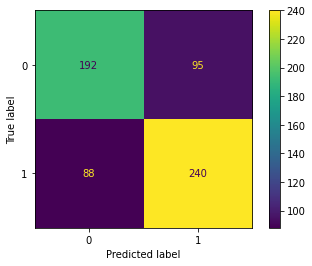

In [257]:
plot_confusion_matrix(gridSearch_int,X_train.values,y_train, values_format="d")

C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


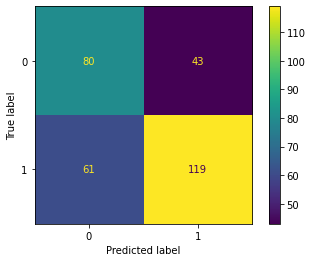

In [258]:
plot_confusion_matrix(gridSearch_int,X_test.values,y_test, values_format="d")

In [239]:
gridSearch_int.best_estimator_

KNeighborsClassifier(n_neighbors=60)

## 4. SVC with only numerical + Cholesterol == 0 masked with the median

In [235]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [
    {"C":      [0.1, 0.5, 0.9, 1, 1.5, 2]},
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3, 4, 5]},
    {"kernel": ["rbf"]},
]

svc_int = SVC(random_state=0)

search_int = GridSearchCV(estimator=svc_int, param_grid=param_grid, scoring="roc_auc")
search_int.fit(X_train.values, y_train)
print("Best Score svc: "+str(search_int.best_score_))
prediction = search_int.predict(X_test.values)
test_accuracy = accuracy_score(y_test,prediction)
print("Test accuracy: "+str(test_accuracy))

Best Score svc: 0.8206391994776749
Test accuracy: 0.7161716171617162


In [176]:
pd.DataFrame(search_int.cv_results_).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013403,0.002153,0.010198,0.001943,0.1,NaN,NaN,{'C': 0.1},0.753057,0.770601,0.737905,0.754111,0.699469,0.743029,0.024113,12
1,0.009802,0.000747,0.005998,0.000631,0.5,NaN,NaN,{'C': 0.5},0.757310,0.769537,0.739766,0.758090,0.709019,0.746744,0.021127,11
2,0.007802,0.001163,0.008205,0.000767,0.9,NaN,NaN,{'C': 0.9},0.758905,0.768740,0.738703,0.759416,0.709019,0.746957,0.021354,10
3,0.008016,0.000899,0.008383,0.001831,1,NaN,NaN,{'C': 1},0.758107,0.768208,0.739234,0.760212,0.709549,0.747062,0.021027,8
4,0.007802,0.000402,0.007798,0.000764,1.5,NaN,NaN,{'C': 1.5},0.760500,0.765550,0.740298,0.763660,0.713263,0.748654,0.019866,5
5,0.008414,0.000485,0.006184,0.000378,2,NaN,NaN,{'C': 2},0.758905,0.762892,0.741095,0.765517,0.713528,0.748387,0.019405,6


C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


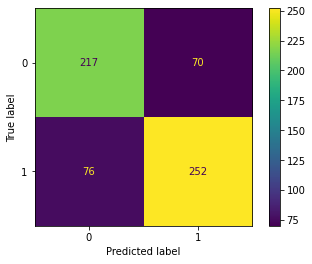

In [236]:
plot_confusion_matrix(search_int,X_train.values,y_train, values_format="d")

C:\Users\eloid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


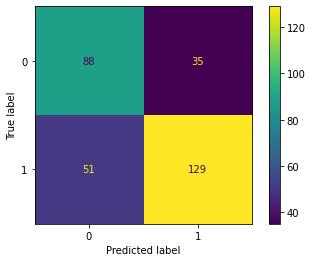

In [237]:
plot_confusion_matrix(search_int,X_test.values,y_test, values_format="d")

In [238]:
search_int.best_estimator_

SVC(kernel='linear', random_state=0)

# ESS on dataset

In [1]:
from EllipticalSliceSampler import EllipticalSampler
from gpc import GPC
from utils import *

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

DATAPATH = "data"
heart = pd.read_csv(os.path.join(DATAPATH,"heart.csv"))
heart
heart_int = heart[heart.describe().columns].drop(['FastingBS'],axis=1)
# drop instead of median
#heart_int['Cholesterol'].mask(heart_int['Cholesterol']==0,heart_int['Cholesterol'].median(),inplace=True)
heart_int_drop = heart_int[heart_int['Cholesterol']!=0]
#heart_int['RestingBP'].mask(heart_int['RestingBP']==0,heart_int['RestingBP'].median(),inplace=True)
heart_int
scaler = StandardScaler()
y = heart_int['HeartDisease'][0:400]
#heart_int = pd.DataFrame(scaler.fit_transform(heart_int[["Cholesterol","MaxHR"]]),columns=["Cholesterol","MaxHR"])
#scale or not: https://www.cs.toronto.edu/pub/radford/slice-aos.pdf (YES)
#reasonable parameters
#chol + hr scatter plot
#prior samples through sigmoid
#same with posterior draws (before and after)
X = heart_int[["Cholesterol","MaxHR"]][0:400]
###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
heart_int_drop

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,140,289,172,0.0,0
1,49,160,180,156,1.0,1
2,37,130,283,98,0.0,0
3,48,138,214,108,1.5,1
4,54,150,195,122,0.0,0
...,...,...,...,...,...,...
913,45,110,264,132,1.2,1
914,68,144,193,141,3.4,1
915,57,130,131,115,1.2,1
916,57,130,236,174,0.0,1


### Choice of covariates to investigate

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

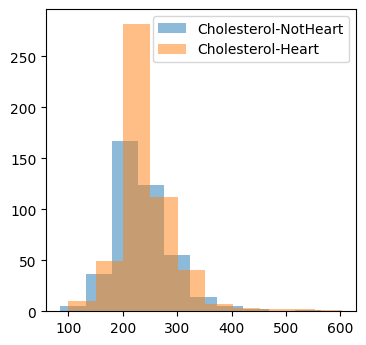

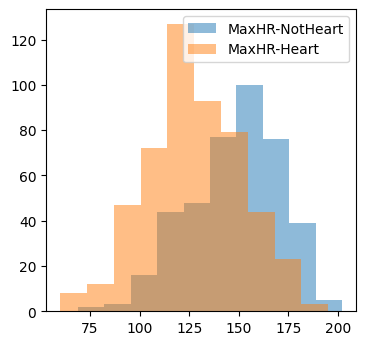

In [26]:
data =  [heart_int[heart_int["HeartDisease"]==0],heart_int[heart_int["HeartDisease"]==1]]
y_data = heart_int['HeartDisease']
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':100})
plt.hist(data[0]['Cholesterol'],label='Cholesterol-NotHeart',alpha=0.5)
plt.hist(data[1]['Cholesterol'],label='Cholesterol-Heart',alpha=0.5)
plt.legend()
plt.show()
plt.hist(data[0]['MaxHR'],label='MaxHR-NotHeart',alpha=0.5)
plt.hist(data[1]['MaxHR'],label='MaxHR-Heart',alpha=0.5)
plt.legend()
plt.show()

Text(0, 0.5, 'MaxHR')

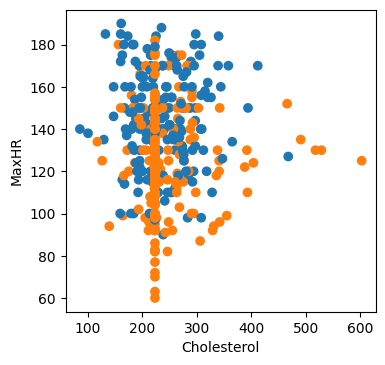

In [29]:
colors = ["tab:orange" if y_i == 1 else "tab:blue" for y_i in y]
f, a = plt.subplots()
a.scatter(X["Cholesterol"], X["MaxHR"], c=colors)
a.set_xlabel("Cholesterol")
a.set_ylabel("MaxHR")

Text(0, 0.5, 'MaxHR')

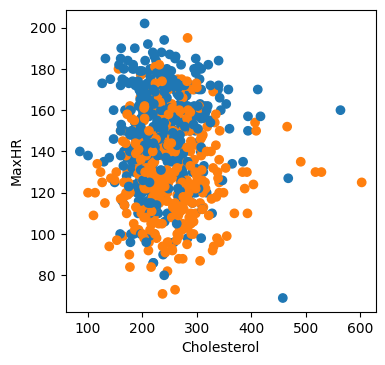

In [34]:
colors = ["tab:orange" if y_i == 1 else "tab:blue" for y_i in heart_int_drop["HeartDisease"]]
f, a = plt.subplots()
a.scatter(heart_int_drop["Cholesterol"], heart_int_drop["MaxHR"], c=colors)
a.set_xlabel("Cholesterol")
a.set_ylabel("MaxHR")

In [ ]:
sns.displot(X)

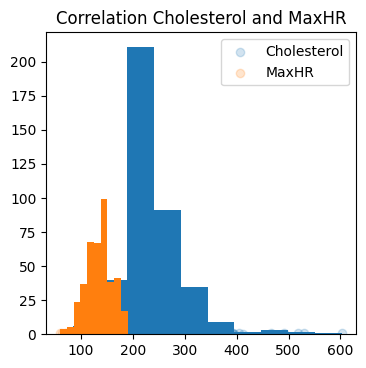

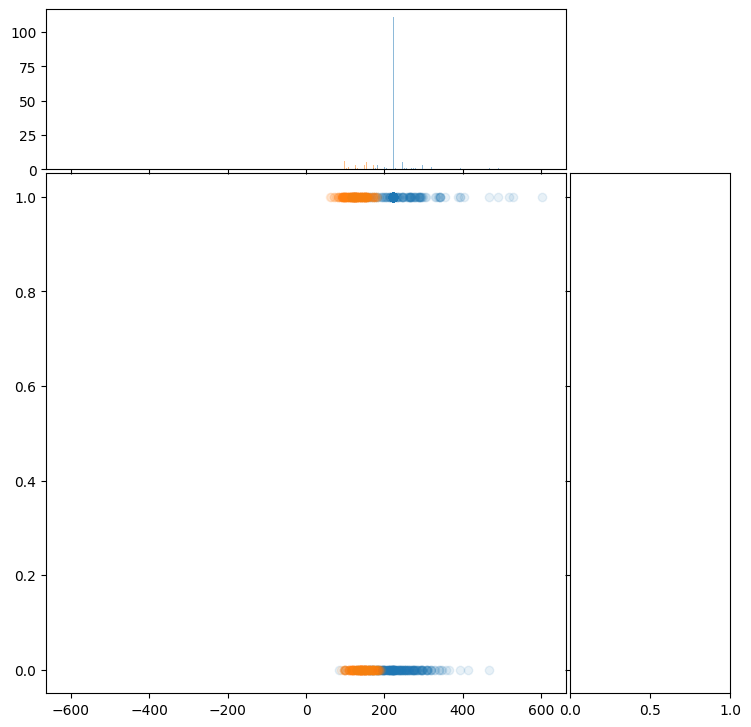

In [4]:
#plt.scatter(X['Cholesterol'],y)
# Scatterplot and Correlations
# Data
value = np.round(np.corrcoef(X['Cholesterol'],X['MaxHR']))
# Plot
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':100})
plt.scatter(X['Cholesterol'], y, label='Cholesterol',alpha=0.2)
plt.scatter(X['MaxHR'], y, label='MaxHR',alpha=0.2)
plt.hist(X['Cholesterol'])
plt.hist(X['MaxHR'])
# Plot
plt.title('Correlation Cholesterol and MaxHR')
plt.legend()
plt.show()
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

def scatter_hist(x,x2, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,alpha=0.1)
    ax.scatter(x2, y,alpha=0.1)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, alpha=0.5)
    ax_histx.hist(x2, bins=bins, alpha=0.5)
    #ax_histy.hist(y, bins=bins, orientation='horizontal')

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(X['Cholesterol'], X['MaxHR'],y, ax, ax_histx, ax_histy)

plt.show()

In [46]:
#wn_pred = gpc_wn.predict(X_test)
#wn_pred = 1/(1+np.exp(wn_pred))
accuracy_score(y_test,np.round(wn_pred[0]))

0.41847826086956524

In [47]:
gpc_linear.fit(X_train_gpc,y_train_gpc,maxiter=300,verbose=1)

c:\Users\eloid\OneDrive - UPV\Escriptori\gp\GP-Classification-Project\gpc.py:63: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-f))
c:\Users\eloid\OneDrive - UPV\Escriptori\gp\GP-Classification-Project\gpc.py:82: RuntimeWarning: divide by zero encountered in log
  np.log(self._sigmoid(f_i)) if y == 1
c:\Users\eloid\OneDrive - UPV\Escriptori\gp\GP-Classification-Project\gpc.py:83: RuntimeWarning: divide by zero encountered in log
  else np.log(self._sigmoid(-f_i))


KeyboardInterrupt: 

In [ ]:
linear_pred = gpc_linear.predict(X_test)

In [ ]:
gpc_gaussian.fit(X_train_gpc,y_train_gpc,maxiter=300,verbose=1)

In [ ]:
gpc_periodic.fit(X_train_gpc,y_train_gpc,maxiter=300,verbose=1)

In [ ]:
gpc_wiener.fit(X_train_gpc,y_train_gpc,maxiter=300,verbose=1)

In [ ]:
gpc_rq.fit(X_train_gpc,y_train_gpc,maxiter=300,verbose=1)

In [ ]:
gpc_poly.fit(X_train_gpc,y_train_gpc,maxiter=300,verbose=1)

In [ ]:
gpc_matern.fit(X_train_gpc,y_train_gpc,maxiter=300,verbose=1)